# print / debug learning rate
# 0.1 and cycle with simplest GPT

In [1]:
import time
import os
start = time.time()

train_epochs=10
learning_rate=0.1
llama_layers=6

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 17:07:12,425] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 17:07:13,252] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 17:07:13,252] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 17:07:13,252] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 17:07:14,051] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 17:07

# Constant lr

In [2]:
import time
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'constant' \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 19:06:51,380] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 19:06:52,216] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 19:06:52,216] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 19:06:52,216] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 19:06:53,069] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 19:06

In [7]:
lr = 3.9999999999999996e-05
# lr = 0.0000400000
vali_loss = [0.3308652, 0.2944952, 0.2804815, 0.2732254, 0.2882608, 0.2785709, 0.2766443, 0.2857528]
tr_loss = [0.2939578, 0.2525803, 0.2425671, 0.2335046, 0.2254678, 0.2176258, 0.2107309, 0.2050531]

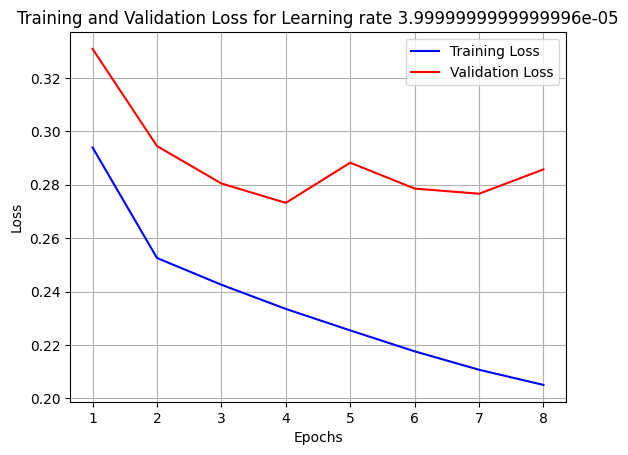

In [9]:
import matplotlib.pyplot as plt

def plot_train_val_loss(train_loss, val_loss, lr=None):
    """
    Plots training and validation loss with optional learning rate values.
    
    Args:
    train_loss (list): List containing training loss values for each epoch.
    val_loss (list): List containing validation loss values for each epoch.
    lr_values (list, optional): List containing learning rate values for each epoch.
    
    Returns:
    legend_labels (list): List containing legend labels for the plot.
    """
    epochs = range(1, len(train_loss) + 1)
    legend_labels = []

    plt.plot(epochs, train_loss, 'b', label='Training Loss')
    legend_labels.append('Training Loss')

    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    legend_labels.append('Validation Loss')

    plt.title(f'Training and Validation Loss for Learning rate {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return legend_labels

legend_labels = plot_train_val_loss(tr_loss, vali_loss, lr)

# Constant lr smaller

In [12]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
train 89115
val 19443
test 19371
d_llm 768
[2024-05-06 21:43:00,106] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-06 21:43:01,058] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-06 21:43:01,059] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-06 21:43:01,059] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-06 21:43:02,012] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.164, master_port=29500
[2024-05-06 21:43

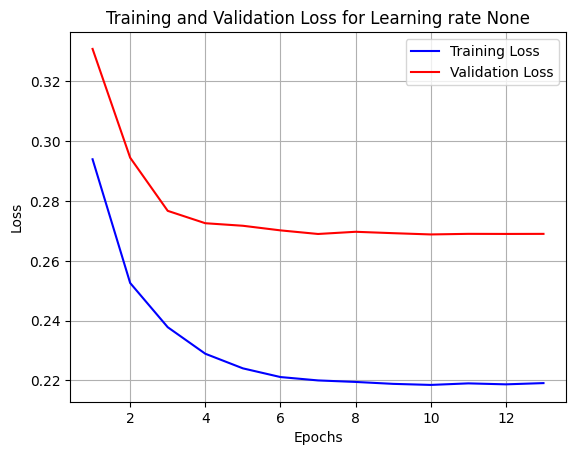

In [13]:
vali_loss = [0.3308652, 0.2944952, 0.2767047, 0.2725649, 0.2717150, 0.2701731, 0.2689678, 0.2697016, 0.2692347, 0.2688137, 0.2690124, 0.2689817, 0.2690037]
tr_loss = [0.2939578, 0.2525803, 0.2377872, 0.2289110, 0.2240235, 0.2211134, 0.2199849, 0.2194789, 0.2188337, 0.2184807, 0.2189967, 0.2186749, 0.2190897]
legend_labels = plot_train_val_loss(tr_loss, vali_loss)

# lradj jist cycle, without update

In [1]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-08 00:45:10,967] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-08 00:45:11,865] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-08 00:45:11,865] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-08 00:45:13,682] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-08 00:45:14,181] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

# Without:

batch_accumulate = 8  # Accumulate gradients over 8 batches

train_steps = len(train_loader) // batch_accumulate

## reduces train steps in OneCycle scheduler

In [2]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main_onecycle_batch.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-08 01:24:31,518] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-08 01:24:32,420] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-08 01:24:32,420] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-08 01:24:34,220] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-08 01:24:35,000] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

# With:

batch_accumulate = 8  # Accumulate gradients over 8 batches

train_steps = len(train_loader) // batch_accumulate

## scheduler step after each batch

In [3]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main_onecycle_batch.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-08 01:49:57,301] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-08 01:49:58,527] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-08 01:49:58,527] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-08 01:50:00,338] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-08 01:50:00,818] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

## scheduler step after epoch

In [1]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main_onecycle_batch.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-08 19:44:13,881] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-08 19:44:14,849] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-08 19:44:14,849] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-08 19:44:16,917] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-08 19:44:17,462] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

# other scheduler:TST

In [3]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --lradj 'TST' \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-09 00:57:58,459] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-09 00:57:59,463] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-09 00:57:59,463] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-09 00:58:01,420] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-09 00:58:02,318] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

## other scheduler: PEMS

In [5]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --lradj 'PEMS' \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-09 01:53:57,651] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-09 01:53:58,666] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-09 01:53:58,667] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-09 01:54:00,391] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-09 01:54:01,875] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

## Last scheduler: type3

In [6]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --lradj 'type3' \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-09 02:46:03,984] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-09 02:46:05,163] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-09 02:46:05,163] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-09 02:46:06,890] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-09 02:46:08,400] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

# Use script without accelerator

### loss normalized after accumulation

In [29]:
import time
import os
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

!python -u ./Time-LLM/run_main_onecycle_no_acc.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

train 89115
val 19443
test 19371
d_llm 768
297it [00:11, 27.23it/s]	iters: 300, epoch: 1 | loss: 0.4145811
	speed: 0.0052s/iter; left time: 382.0580s
597it [00:22, 27.42it/s]	iters: 600, epoch: 1 | loss: 0.3224525
	speed: 0.0049s/iter; left time: 357.6010s
897it [00:33, 27.75it/s]	iters: 900, epoch: 1 | loss: 0.3556311
	speed: 0.0047s/iter; left time: 348.4372s
1199it [00:44, 27.75it/s]	iters: 1200, epoch: 1 | loss: 0.2017507
	speed: 0.0047s/iter; left time: 342.1700s
1499it [00:55, 27.94it/s]	iters: 1500, epoch: 1 | loss: 0.3322132
	speed: 0.0047s/iter; left time: 338.4539s
1797it [01:05, 28.20it/s]	iters: 1800, epoch: 1 | loss: 0.6077929
	speed: 0.0046s/iter; left time: 332.6560s
2099it [01:16, 27.86it/s]	iters: 2100, epoch: 1 | loss: 0.5283546
	speed: 0.0046s/iter; left time: 330.3436s
2397it [01:26, 27.77it/s]	iters: 2400, epoch: 1 | loss: 0.4719534
	speed: 0.0046s/iter; left time: 328.3591s
2697it [01:37, 27.35it/s]	iters: 2700, epoch: 1 | loss: 0.1269197
	speed: 0.0046s/iter; lef

### loss normalized before accumulation (as it is)

In [31]:
import time
import os
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

!python -u ./Time-LLM/run_main_onecycle_no_acc.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

train 89115
val 19443
test 19371
d_llm 768
997it [00:36, 27.65it/s]	iters: 1000, epoch: 1 | loss: 0.0283050
	speed: 0.0047s/iter; left time: 341.8459s
1997it [01:12, 27.77it/s]	iters: 2000, epoch: 1 | loss: 0.0144444
	speed: 0.0046s/iter; left time: 331.0759s
2999it [01:48, 27.94it/s]	iters: 3000, epoch: 1 | loss: 0.0150700
	speed: 0.0046s/iter; left time: 324.5582s
3998it [02:24, 27.93it/s]	iters: 4000, epoch: 1 | loss: 0.0234409
	speed: 0.0045s/iter; left time: 319.1732s
4997it [03:00, 28.04it/s]	iters: 5000, epoch: 1 | loss: 0.0299030
	speed: 0.0045s/iter; left time: 313.9978s
5997it [03:36, 27.40it/s]	iters: 6000, epoch: 1 | loss: 0.0546225
	speed: 0.0045s/iter; left time: 309.2131s
6999it [04:12, 27.87it/s]	iters: 7000, epoch: 1 | loss: 0.1139813
	speed: 0.0045s/iter; left time: 304.3967s
7997it [04:48, 27.82it/s]	iters: 8000, epoch: 1 | loss: 0.0267107
	speed: 0.0045s/iter; left time: 299.5498s
8997it [05:24, 27.82it/s]	iters: 9000, epoch: 1 | loss: 0.0382936
	speed: 0.0045s/iter

### Use gradient accumulation with accelerator

In [2]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=6

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --lradj 'constant' \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
d_llm 768
[2024-05-10 12:29:00,685] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-10 12:29:01,471] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-10 12:29:01,471] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-10 12:29:01,471] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-10 12:29:02,262] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-10 12:29:02,262] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-10 12:29:02,807] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: False
[2024-05-10 12:29:02,808] [INFO] [logging.py:96:log_dist] [Rank 0] Using clien

In [3]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=12

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
d_llm 768
[2024-05-10 14:07:24,735] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-10 14:07:25,558] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-10 14:07:25,559] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-10 14:07:25,559] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-10 14:07:26,337] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-10 14:07:26,337] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-10 14:07:26,907] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabled: False
[2024-05-10 14:07:26,908] [INFO] [logging.py:96:log_dist] [Rank 0] Using clien

## Some random text 

In [4]:
import time
import os
start = time.time()

train_epochs=20
learning_rate=0.001
llama_layers=6

# num_process=1
batch_size=3
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


!python -m accelerate.commands.launch  --mixed_precision bf16 --num_processes=1 --num_machines 1 --dynamo_backend "no" --main_process_port "01025" ./Time-LLM/run_main_copy.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id 1 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")

train 89115
val 19443
test 19371
What if I write here some words? Squirrel, bear, kitty, ice cream, wood. They are totally random and do not describe my task.
d_llm 768
[2024-05-10 21:04:52,616] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-10 21:04:53,404] [INFO] [logging.py:96:log_dist] [Rank -1] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-10 21:04:53,404] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-10 21:04:53,404] [INFO] [comm.py:652:init_distributed] Not using the DeepSpeed or dist launchers, attempting to detect MPI environment...
[2024-05-10 21:04:54,235] [INFO] [comm.py:702:mpi_discovery] Discovered MPI settings of world_rank=0, local_rank=0, world_size=1, master_addr=141.20.21.44, master_port=29500
[2024-05-10 21:04:54,236] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
[2024-05-10 21:04:54,754] [INFO] [logging.py:96:log_dist] [

# Plot results

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

trues = np.load('./results/TimeLLM/FR/true.npy')[:, :, 0] # "flatten"
preds = np.load('./results/TimeLLM/FR/pred.npy')[:, :, 0]

mse = mean_squared_error(preds, trues)
mae = mean_absolute_error(preds, trues)
print(mse, mae)

0.33841595 0.34967828


In [4]:
import matplotlib.pyplot as plt

def visual(true, preds=None):
    """
    Results visualization
    """
    plt.figure()
    plt.plot(true, label='GroundTruth', linewidth=2)
    if preds is not None:
        plt.plot(preds, label='Prediction', linewidth=2)
    plt.legend()
    # plt.savefig(name, bbox_inches='tight')

In [5]:
# Reshape the data to split the features
idx = int(19371/3)


# Reshape the data to separate features
feature1 = trues[:idx, :]
feature2 = trues[idx:idx*2, :]
feature3 = trues[idx*2:idx*3, :]

# Reshape the data to separate features
feature11 = preds[:idx, :]
feature22 = preds[idx:idx*2, :]
feature33 = preds[idx*2:idx*3, :]


# Now you have three separate arrays for each feature
print("Feature 1 shape:", feature1.shape)
print("Feature 2 shape:", feature2.shape)
print("Feature 3 shape:", feature3.shape)

Feature 1 shape: (6457, 24)
Feature 2 shape: (6457, 24)
Feature 3 shape: (6457, 24)


In [7]:
mean_squared_error(feature1, feature11)

0.0512778

In [8]:
mean_squared_error(feature2, feature22)

0.14831686

In [9]:
mean_squared_error(feature3, feature33)

0.8156534

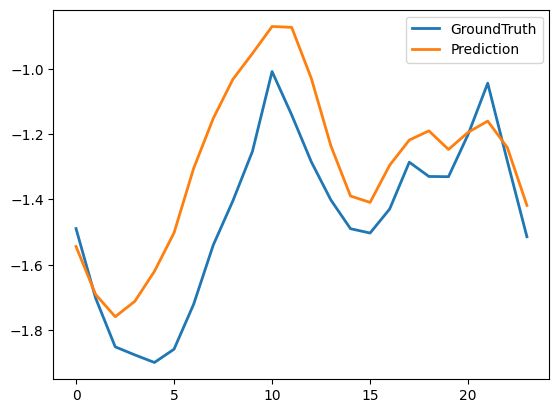

In [6]:
gt = feature1[3000, :]
pd = feature11[3000, :]
visual(gt, pd)

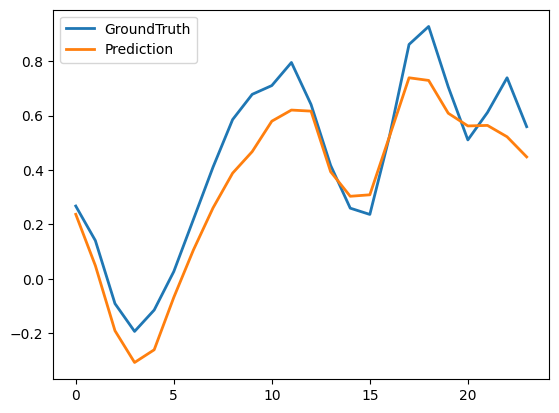

In [10]:
gt = feature1[0, :]
pd = feature11[0, :]
visual(gt, pd)

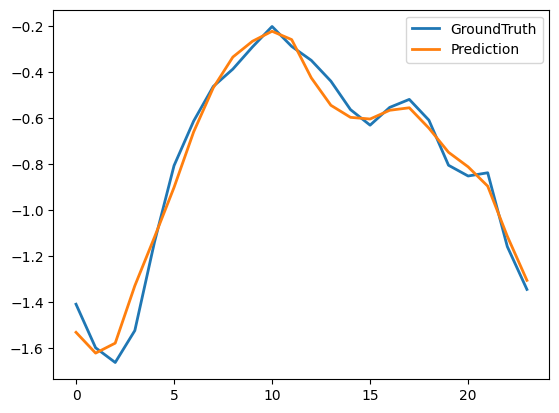

In [11]:
gt = feature1[6000, :]
pd = feature11[6000, :]
visual(gt, pd)

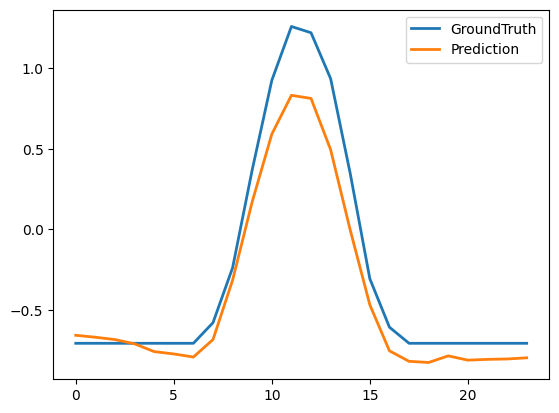

In [12]:
gt = feature2[0, :]
pd = feature22[0, :]
visual(gt, pd)

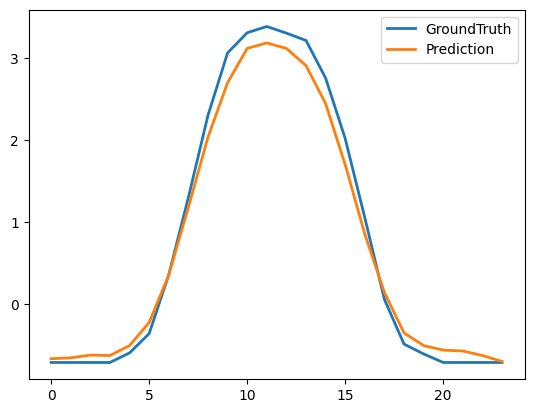

In [13]:
gt = feature2[3000, :]
pd = feature22[3000, :]
visual(gt, pd)

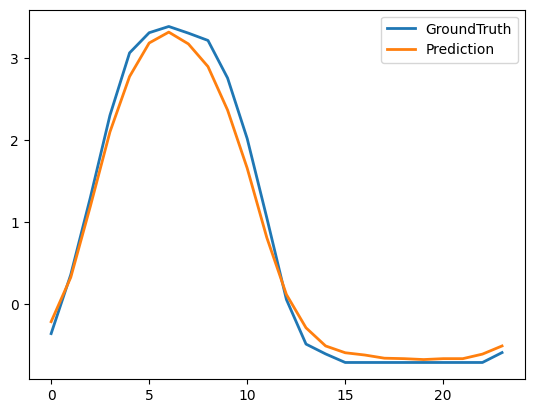

In [23]:
gt = feature2[3005, :]
pd = feature22[3005, :]
visual(gt, pd)

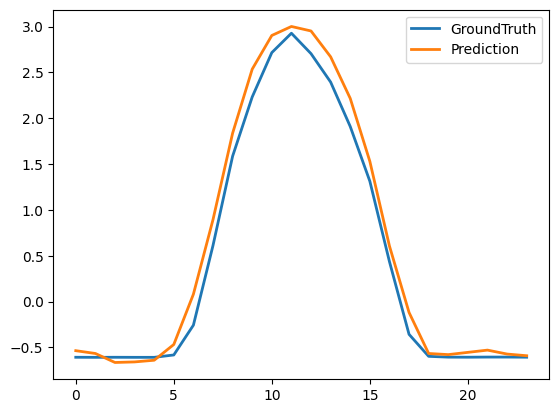

In [14]:
gt = feature2[6000, :]
pd = feature22[6000, :]
visual(gt, pd)

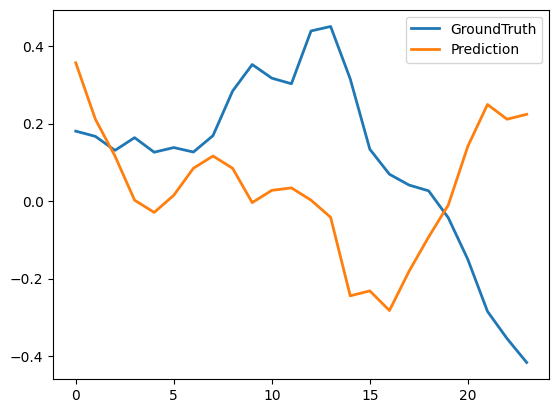

In [15]:
gt = feature3[0, :]
pd = feature33[0, :]
visual(gt, pd)

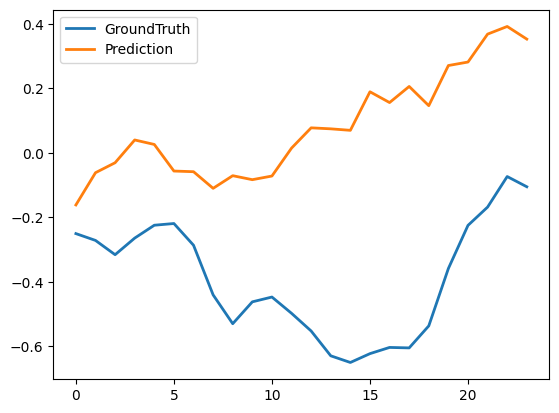

In [16]:
gt = feature3[3000, :]
pd = feature33[3000, :]
visual(gt, pd)

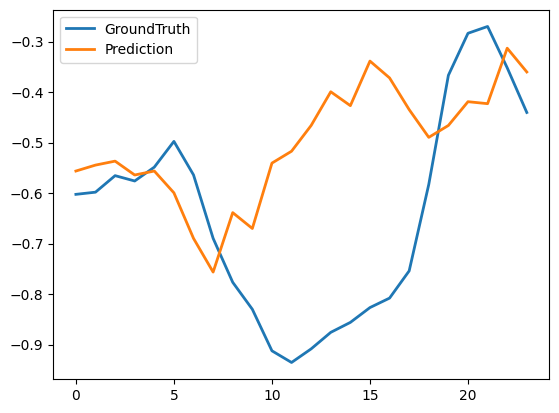

In [17]:
gt = feature3[6000, :]
pd = feature33[6000, :]
visual(gt, pd)

In [64]:
col1 = mean_squared_error(trues[:idx, :], preds[:idx, :])
col2 = mean_squared_error(trues[idx:idx*2, :], preds[idx:idx*2, :])
col3 = mean_squared_error(trues[idx*2:idx*3, :], preds[idx*2:idx*3, :])

In [65]:
(col1 + col2 + col3)/3

0.3385696808497111

In [68]:
col1 = mean_squared_error(trues[:10000, :], preds[:10000, :])
col2 = mean_squared_error(trues[10000:20000, :], preds[10000:20000, :])
(col1 + col2)/2

0.34703329205513

In [69]:
col1 = mean_squared_error(trues[:100, :], preds[:100, :])
col2 = mean_squared_error(trues[100:20000, :], preds[100:20000, :])
(col1 + col2)/2

0.21466094255447388

# Convert into column results

In [143]:
import torch

# Divides 0th dimension into 3 parts/features
tr = torch.tensor(trues.reshape(3, int(trues.shape[0]/3), int(trues.shape[1]))).permute(1, 2, 0)
pr = torch.tensor(preds.reshape(3, int(preds.shape[0]/3), int(preds.shape[1]))).permute(1, 2, 0)

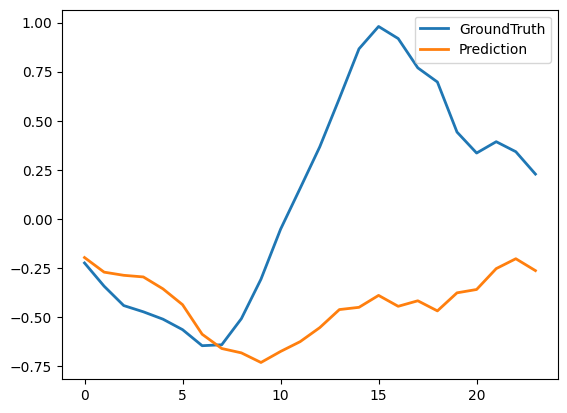

In [142]:
import matplotlib.pyplot as plt
#gt = np.concatenate((input[0, :, -1], true[0, :, -1]), axis=0)
# pd = np.concatenate((input[0, :, -1], pred[0, :, -1]), axis=0)

gt = tr[6000, :, -1]
pd = pr[6000, :, -1]

# def visual(true, preds=None, name='./pic/test.pdf'):
def visual(true, preds=None):
    """
    Results visualization
    """
    plt.figure()
    plt.plot(true, label='GroundTruth', linewidth=2)
    if preds is not None:
        plt.plot(preds, label='Prediction', linewidth=2)
    plt.legend()
    # plt.savefig(name, bbox_inches='tight')


#visual(gt, pd, os.path.join(folder_path, str(i) + '.pdf'))
visual(gt, pd)

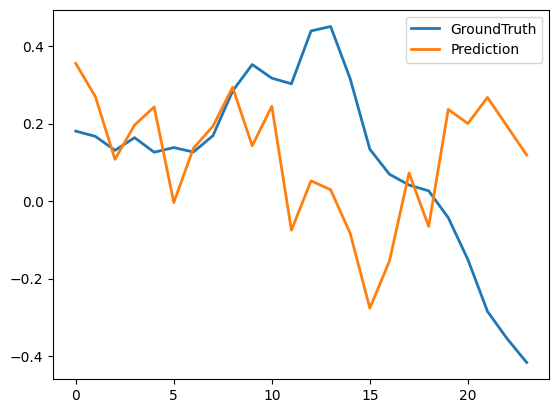

In [130]:
gt = tr[0, :, -1]
pd = pr[0, :, -1]
visual(gt, pd)

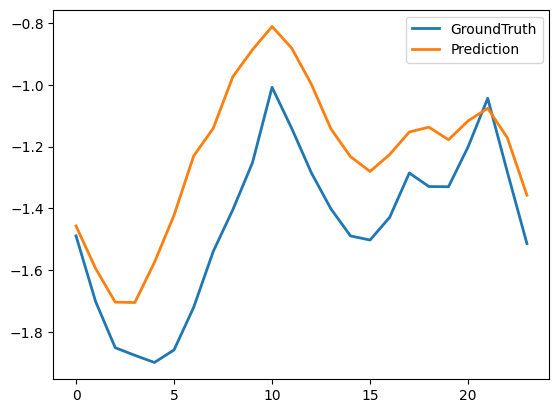

In [131]:
gt = tr[3000, :, 0]
pd = pr[3000, :, 0]
visual(gt, pd)

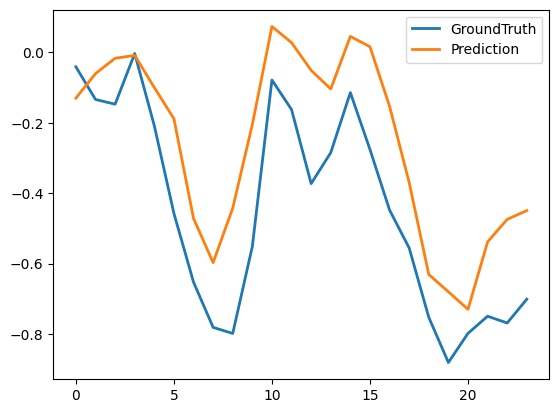

In [132]:
gt = tr[2000, :, 0]
pd = pr[2000, :, 0]
visual(gt, pd)

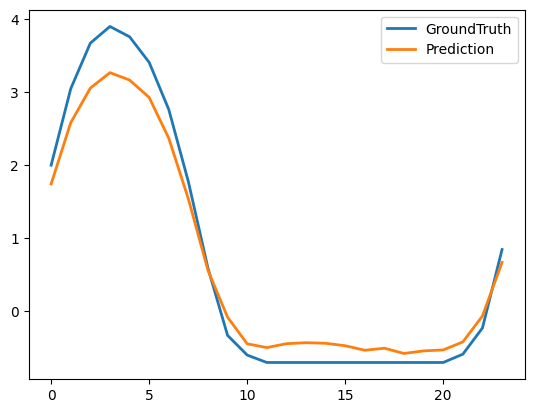

In [133]:
gt = tr[2000, :, 1]
pd = pr[2000, :, 1]
visual(gt, pd)

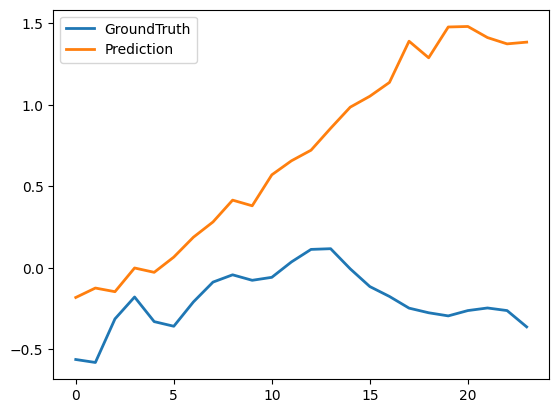

In [134]:
gt = tr[2000, :, 2]
pd = pr[2000, :, 2]
visual(gt, pd)

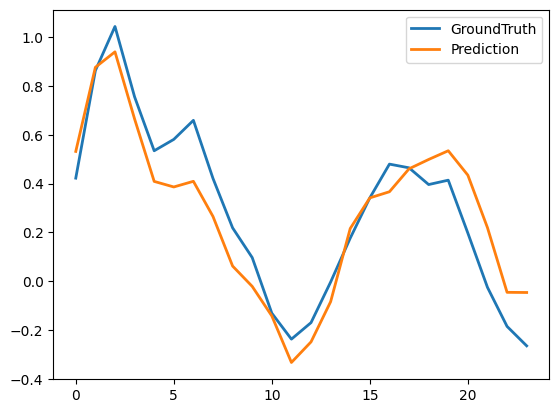

In [135]:
gt = tr[1000, :, 0]
pd = pr[1000, :, 0]
visual(gt, pd)

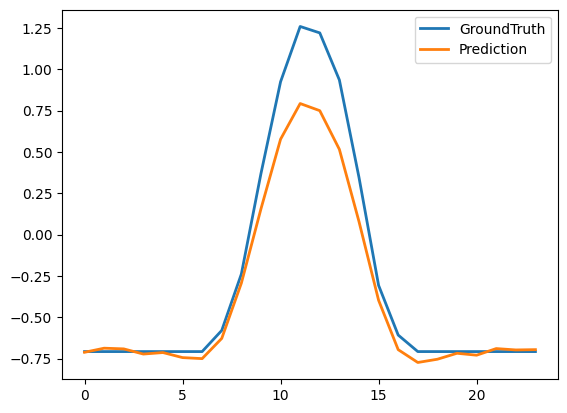

In [136]:
gt = tr[0, :, 1]
pd = pr[0, :, 1]
visual(gt, pd)

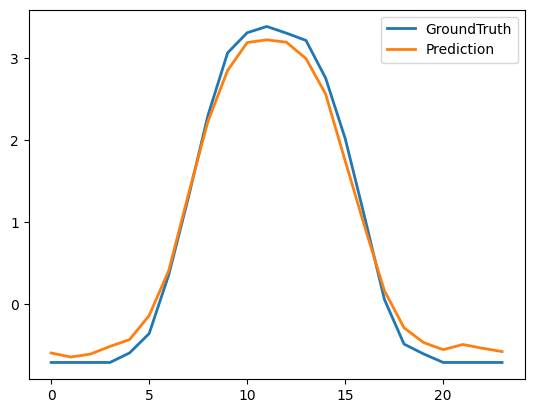

In [138]:
gt = tr[3000, :, 1]
pd = pr[3000, :, 1]
visual(gt, pd)

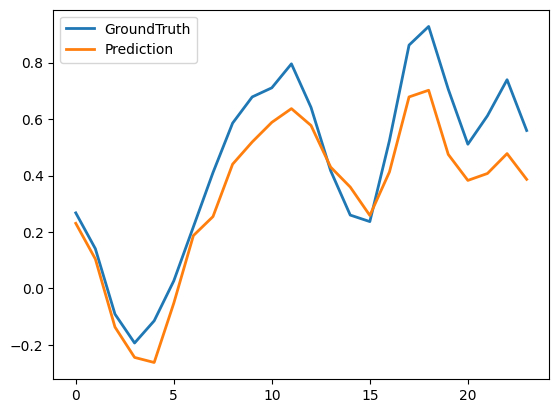

In [137]:
gt = tr[0, :, 0]
pd = pr[0, :, 0]
visual(gt, pd)

# From here

In [10]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --lradj 'PEMS' \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-09 06:06:42,027] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-09 06:06:43,058] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-09 06:06:43,059] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 1024
[2024-05-09 06:06:45,133] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-09 06:06:45,724] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabl

In [9]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=16
d_ff=64
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2-medium" \
  --llm_dim 1024 \
  --d_model $d_model \
  --lradj 'PEMS' \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-09 04:53:50,287] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-09 04:53:51,310] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-09 04:53:51,311] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 1024
[2024-05-09 04:53:53,971] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-09 04:53:54,793] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enabl

In [8]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=16
d_ff=64
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-09 03:45:12,060] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-09 03:45:13,004] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-09 03:45:13,004] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
d_llm 768
[2024-05-09 03:45:14,780] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed info: version=0.14.0, git-hash=unknown, git-branch=unknown
[2024-05-09 03:45:15,648] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed Flops Profiler Enable

# More words in dataset description

In [24]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-11 16:29:34,451] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-11 16:29:35,545] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-11 16:29:35,545] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
Hourly data detailing load (electricity consumption), solar generation, and wind generation. These metrics are crucial in the electric power demand planning.  The input data is organized this way: First third is the load time series, second thi

# Num tokens=100 with bigger prompt

In [25]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-11 17:40:38,035] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-11 17:40:39,010] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-11 17:40:39,010] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
Hourly data detailing load (electricity consumption), solar generation, and wind generation. These metrics are crucial in the electric power demand planning.  The input data is organized this way: First third is the load time series, second thi

# Num tokens=100 with shorter prompt

In [26]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-11 20:00:30,024] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-11 20:00:31,026] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-11 20:00:31,026] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
Hourly data detailing load (electricity consumption), solar generation, and wind generation. These metrics are crucial in the electric power demand planning.
d_llm 768
[2024-05-11 20:00:32,728] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed

# The original one

In [27]:
import time
start = time.time()

train_epochs=20
#learning_rate=0.0001
# learning_rate= 0.01
# Epoch: 1 | Train Loss: 0.3189694 Vali Loss: 0.3789306 Test Loss: 0.4752660 MAE Loss: 0.4676420
learning_rate = 0.001
llama_layers=6 # 626 sec on 1 epoch # 13 min, # 1095 sec

# num_process=1
batch_size=24
d_model=32
d_ff=128
# --num_processes 1 --num_machines 1
comment='TimeLLM-FR'

!python -m accelerate.commands.launch --mixed_precision bf16 --num_processes=1 --main_process_port "01025" ./Time-LLM/run_main.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path ./datasets/ \
  --data_path FR_data.csv \
  --model_id FR_96_24 \
  --model "TimeLLM" \
  --data FR \
  --features M \
  --seq_len 512 \
  --label_len 48 \
  --pred_len 24 \
  --factor 3 \
  --enc_in 3 \
  --dec_in 3 \
  --c_out 3 \
  --des 'Exp' \
  --itr 1 \
  --llm_model "GPT2" \
  --llm_dim 768 \
  --d_model $d_model \
  --d_ff $d_ff \
  --batch_size $batch_size \
  --learning_rate $learning_rate \
  --llm_layers $llama_layers \
  --train_epochs $train_epochs \
  --model_comment $comment

end = time.time()

print("Total time:", (end - start)/60, "min.")
# train 88899 # 89115
# val 25707 # 25923
# test 12675 # 12891

The following values were not passed to `accelerate launch` and had defaults used instead:
		More than one GPU was found, enabling multi-GPU training.
		If this was unintended please pass in `--num_processes=1`.
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
[2024-05-11 22:19:18,516] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)
[2024-05-11 22:19:19,506] [INFO] [comm.py:637:init_distributed] cdb=None
[2024-05-11 22:19:19,506] [INFO] [comm.py:668:init_distributed] Initializing TorchBackend in DeepSpeed with backend nccl
train 89115
val 19443
test 19371
Hourly data detailing load (electricity consumption), solar generation, and wind generation. These metrics are crucial in the electric power demand planning.
d_llm 768
[2024-05-11 22:19:20,988] [INFO] [logging.py:96:log_dist] [Rank 0] DeepSpeed